<a id='section_id3'></a>
# Kennzahl Umwelteinfluss

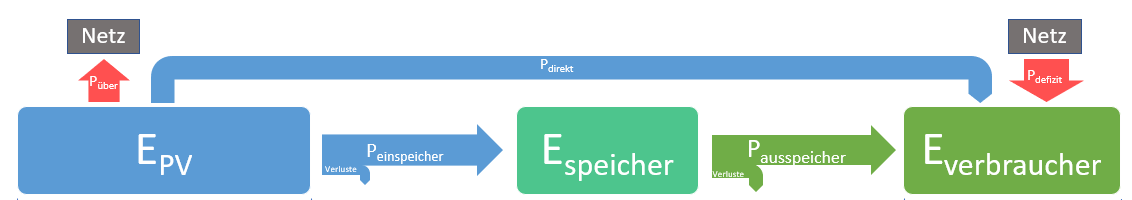

 
\begin{eqnarray}
CO2_{proJahr}=E_{defizit}\cdot CO2_{Netzbezug}+CO2_{System}/20Jahre
\end{eqnarray}

## Initialisierung

In [1]:
from parameter_base_case import *
Lastprofilnr=31


Nr=str(Lastprofilnr)
with open(directory_data+'Lastprofil_'+Nr+'.npy', 'rb') as f:
    [P_verbraucher, P_pv, P_dif, P_def, P_ueber] = np.load(f)

E_verbraucher = jahresenergie_kWh(P_verbraucher)
E_def = jahresenergie_kWh(P_def)
E_ueber = jahresenergie_kWh(P_ueber)

#Zeitausschnitte für Visualisierung
days = timeline.minute_period('2019-09-22','2019-09-25')
year = timeline.minute_period('2019-01-01','2019-12-31')
year_dayres = timeline.day_period('2019-01-01','2019-12-31')

##Batteriesystemdaten laden
with open(directory_data+'batterie_kapazitaet_'+file_extension+Nr+'.npy', 'rb') as f:
    [E_bat_max_array, E_jahr_bat] = np.load(f)
##Wasserstoffsystemdaten laden
with open(directory_data+'RFC_speicherleistung_'+file_extension+Nr+'.npy', 'rb') as f:
    [P_RFC_charge_max_array_, E_h2_netto_] = np.load(f)
##Wasserstoffsystem+Sektorkopplung Daten laden
with open(directory_data+'RFC_sektorkopplung_speicherleistung_'+file_extension+Nr+'.npy', 'rb') as f:
    [P_RFC_charge_max_array_sektor, E_h2_elektro_netto, E_h2_waerme_netto] = np.load(f)
##Wasserstoffverkauf Daten laden
with open(directory_data+'P2G_speicherleistung_'+file_extension+Nr+'.npy', 'rb') as f:
    [P_P2G_charge_max_array_, E_jahr_P2G_] = np.load(f)

    
years = np.arange(0,21)



In [2]:
print('Strommix CO2:',Strommix_CO2, 'kg/kWh')
print('Batterieproduktion CO2:',Batterie_CO2, 'kg/kWh')
print('Brennstoffzellensystem Stackproduktion CO2:',H2System_CO2, 'kg/kWh')
print('"grauer Wasserstoff" aus Dampfreformierung CO2:',Dampfreformierung_CO2, 'kg/kWh')

Strommix CO2: 0.4 kg/kWh
Batterieproduktion CO2: 150 kg/kWh
Brennstoffzellensystem Stackproduktion CO2: 30 kg/kWh
"grauer Wasserstoff" aus Dampfreformierung CO2: 0.32 kg/kWh


# -------------------------------------------------------------------------------------------------------------


## Wasserstoffrückverstromung (ohne Sektorkopplung)

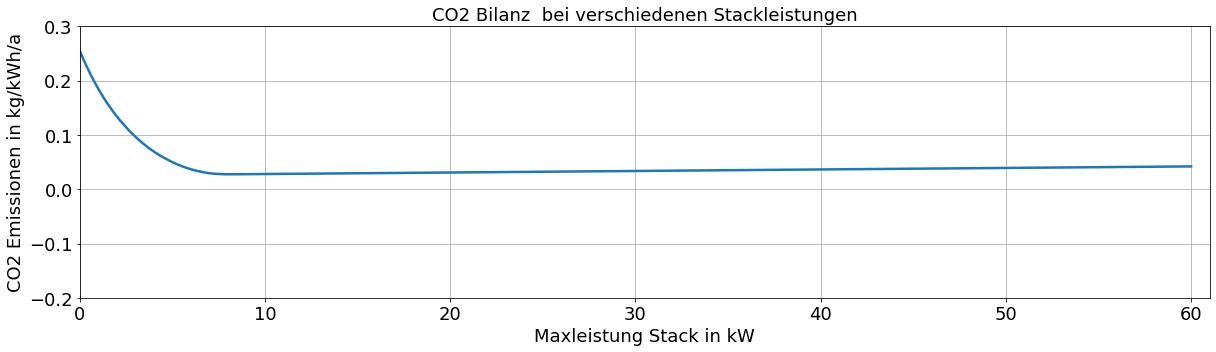

In [3]:
P_RFC_charge_max_array = np.concatenate((P_RFC_charge_max_array_,np.array([40000,60000])), axis=0)
E_h2_netto = np.concatenate((E_h2_netto_,np.array([max(E_h2_netto_),max(E_h2_netto_)])), axis=0)

CO2_20Jahre_array = (E_def-E_h2_netto)*Strommix_CO2*20+H2System_CO2*P_RFC_charge_max_array/1000
ax=vis.plot(P_RFC_charge_max_array/1000,CO2_20Jahre_array/E_verbraucher/20, 'Maxleistung Stack in kW',\
         'CO2 Emissionen in kg/kWh/a',\
         'CO2 Bilanz  bei verschiedenen Stackleistungen')
plt.xlim(0,61)
plt.ylim(-0.2,0.3)
plt.tight_layout()
vis.save_to_tex('diagramm_umwelteinfluss_elektrolyseurleistung_RFC'+'_'+file_extension,ax)



#entwicklung über 20 jahre bei 1000W Stackleistung
element=find_value(E_h2_netto,1000)
CO2_RFC_1kW = (E_def-E_h2_netto[element])*Strommix_CO2*years+H2System_CO2*P_RFC_charge_max_array[element]/1000
CO2_RFC_1kW=CO2_RFC_1kW/E_verbraucher
#vis.plot(years,CO2_RFC_1kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')

#entwicklung über 20 jahre bei 2000W Stackleistung
element=find_value(P_RFC_charge_max_array,2000)
CO2_RFC_2kW = (E_def-E_h2_netto[element])*Strommix_CO2*years+H2System_CO2*P_RFC_charge_max_array[element]/1000
CO2_RFC_2kW=CO2_RFC_2kW/E_verbraucher
#vis.plot(years,CO2_RFC_2kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')

#entwicklung über 20 jahre bei 3000W Stackleistung
element=find_value(P_RFC_charge_max_array,3000)
CO2_RFC_3kW = (E_def-E_h2_netto[element])*Strommix_CO2*years+H2System_CO2*P_RFC_charge_max_array[element]/1000
CO2_RFC_3kW=CO2_RFC_3kW/E_verbraucher
#vis.plot(years,CO2_RFC_3kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')

# ----------------------------------------------------------------------------------------------------------------

## Vergleichsgrößen aus Elektromobilität


In [4]:
#entwicklung über 20 jahre bei 60kWh Kapazität als Vergleich Größenklasse Autobatterie
element=find_value(E_bat_max_array,60)
CO2_batterie_60 = (E_def-E_jahr_bat[element])*Strommix_CO2*years+Batterie_CO2*60
CO2_batterie_60 = CO2_batterie_60/E_verbraucher
#vis.plot(years,CO2_batterie_60,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen','CO2 Ausstoß mit 5kWh Batteriespeicher über Nutzungsdauer')

#entwicklung über 20 jahre bei 60kW Stackleistung vergleichbar mit Brennstoffzellenauto
CO2_RFC_60kW = (E_def-E_h2_netto[np.size(E_h2_netto)-1])*Strommix_CO2*years+H2System_CO2*60
CO2_RFC_60kW=CO2_RFC_60kW/E_verbraucher
#vis.plot(years,CO2_RFC_60kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')

# ------------------------------------------------------------------------------------------------------------

## Batteriespeicher

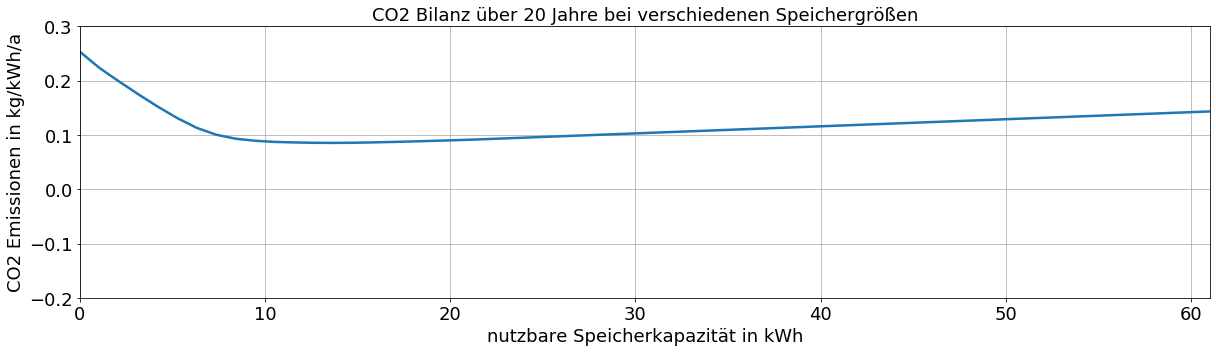

In [9]:
CO2_20Jahre_array = (E_def-E_jahr_bat)*Strommix_CO2*20+Batterie_CO2*E_bat_max_array
ax=vis.plot(E_bat_max_array,CO2_20Jahre_array/E_verbraucher/20, 'nutzbare Speicherkapazität in kWh',\
         'CO2 Emissionen in kg/kWh/a',\
         'CO2 Bilanz über 20 Jahre bei verschiedenen Speichergrößen')
plt.xlim(0,61)
plt.ylim(-0.2,0.3)
plt.tight_layout()
vis.save_to_tex('diagramm_umwelteinfluss_batterie'+'_'+file_extension,ax)


#entwicklung über 20 jahre bei 3kWh Kapazität
element=find_value(E_bat_max_array,3)
CO2_batterie_3 = (E_def-E_jahr_bat[element])*Strommix_CO2*years+Batterie_CO2*E_bat_max_array[element]
CO2_batterie_3 = CO2_batterie_3/E_verbraucher
#vis.plot(years,CO2_batterie,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen','CO2 Ausstoß mit 10kWh Batteriespeicher über Nutzungsdauer')

#entwicklung über 20 jahre bei 5kWh Kapazität
element=find_value(E_bat_max_array,5)
CO2_batterie_5 = (E_def-E_jahr_bat[element])*Strommix_CO2*years+Batterie_CO2*E_bat_max_array[element]
CO2_batterie_5 = CO2_batterie_5/E_verbraucher
#vis.plot(years,CO2_batterie_5,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen','CO2 Ausstoß mit 5kWh Batteriespeicher über Nutzungsdauer')

# --------------------------------------------------------------------------------

## Wasserstoffverkauf

\begin{eqnarray}
CO2_{proJahr}=E_{defizit}\cdot CO2_{Netzbezug}+CO2_{System}/20Jahre-CO2_{Dampfreformierung}\cdot E_{Wasserstoff aus P2G}
\end{eqnarray}

CO2 wird eingespart, da "grauer" Wasserstoff aus Dampfreformierung durch "grünen" Wasserstoff aus der Elektrolyse (P2G/Power to Gas) ersetzt wird

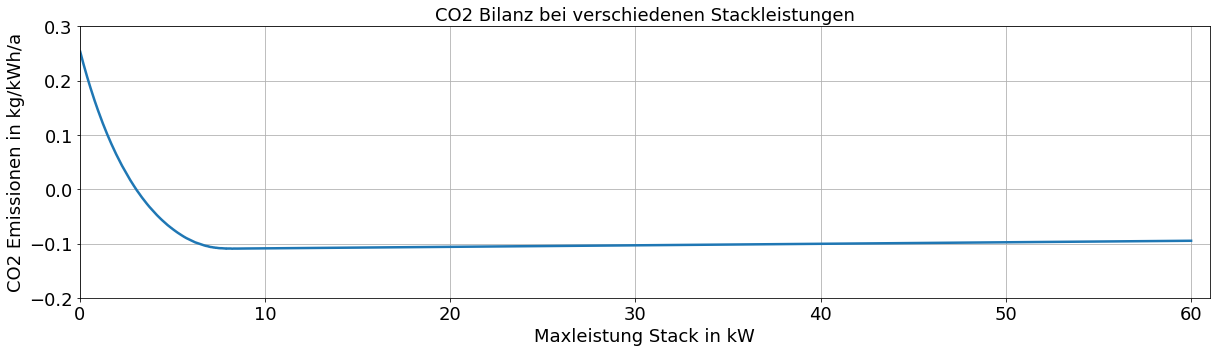

In [6]:
P_P2G_charge_max_array = np.concatenate((P_RFC_charge_max_array_,np.array([40000,60000])), axis=0)
E_jahr_P2G = np.concatenate((E_jahr_P2G_,np.array([max(E_jahr_P2G_),max(E_jahr_P2G_)])), axis=0)

#vis.plot(P_P2G_charge_max_array, E_jahr_P2G)
CO2_20Jahre_array = 20*E_def*Strommix_CO2+H2System_CO2*P_P2G_charge_max_array/1000-Dampfreformierung_CO2*E_jahr_P2G*20 

ax=vis.plot(P_P2G_charge_max_array/1000, CO2_20Jahre_array/20/E_verbraucher,'Maxleistung Stack in kW',\
         'CO2 Emissionen in kg/kWh/a',\
         'CO2 Bilanz bei verschiedenen Stackleistungen')
plt.xlim(0,61)
plt.ylim(-0.2,0.3)
plt.tight_layout()
vis.save_to_tex('diagramm_umwelteinfluss_elektrolyseurleistung_P2G'+'_'+file_extension,ax)

#entwicklung über 20 jahre bei 1000W Stackleistung
element=find_value(P_RFC_charge_max_array,1000)
CO2_P2G_1kW = years*E_def*Strommix_CO2+H2System_CO2*P_RFC_charge_max_array[element]/1000-Dampfreformierung_CO2*E_jahr_P2G[element]*years 
CO2_P2G_1kW=CO2_P2G_1kW/E_verbraucher
#vis.plot(years,CO2_P2G_1kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')
#entwicklung über 20 jahre bei 2000W Stackleistung
element=find_value(P_RFC_charge_max_array,2000)
CO2_P2G_2kW = years*E_def*Strommix_CO2+H2System_CO2*P_RFC_charge_max_array[element]/1000-Dampfreformierung_CO2*E_jahr_P2G[element]*years 
CO2_P2G_2kW=CO2_P2G_2kW/E_verbraucher
#vis.plot(years,CO2_P2G_2kW,'Nutzungsdauer in Jahren','CO2-Ausstoß in Tonnen')

# -----------------------------------------------------------------------------------
## ohne Speicher

In [7]:
CO2_projahr = E_def*Strommix_CO2/E_verbraucher
print('Pro Jahr',CO2_projahr,'kg CO2 pro kWh Verbrauch')

CO2_ohneSpeicher = years*E_def*Strommix_CO2/E_verbraucher #in kg/kWh
#vis.plot(years, CO2_ohneSpeicher)

Pro Jahr 0.253403400800855 kg CO2 pro kWh Verbrauch


# ------------------------------------------------------------------------------------


## Vergleich

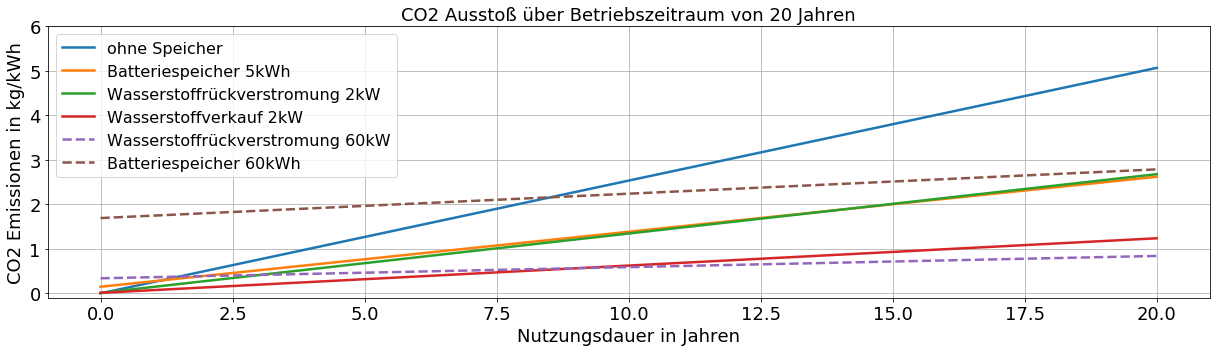

In [8]:
ax=vis.plot(years, CO2_ohneSpeicher,'Nutzungsdauer in Jahren','CO2 Emissionen in kg/kWh','CO2 Ausstoß über Betriebszeitraum von 20 Jahren')
legend=['ohne Speicher']

vis.addtoplot(ax,years,CO2_batterie_5)
legend.append('Batteriespeicher 5kWh')

#vis.addtoplot(ax,years,CO2_RFC_1kW)
#legend.append('Wasserstoffrückverstromung 1kW')
vis.addtoplot(ax,years,CO2_RFC_2kW)
legend.append('Wasserstoffrückverstromung 2kW')
#vis.addtoplot(ax,years,CO2_RFC_3kW)
#legend.append('Wasserstoffrückverstromung 3kW')

vis.addtoplot(ax,years,CO2_P2G_2kW)
legend.append('Wasserstoffverkauf 2kW')

vis.addtoplot(ax,years,CO2_RFC_60kW)
legend.append('Wasserstoffrückverstromung 60kW')
vis.addtoplot(ax,years,CO2_batterie_60)
legend.append('Batteriespeicher 60kWh')


ax.lines[len(ax.lines)-2].set_linestyle('--')    
ax.lines[len(ax.lines)-1].set_linestyle('--')    
plt.legend(legend, fontsize=16)
plt.ylim(-0.1,0.3*20)
plt.tight_layout()
vis.save_to_tex('diagramm_umwelteinfluss_vergleich'+'_'+file_extension,ax)

##Detailansicht erste fünf Jahre
'''
ax=vis.plot(years, CO2_ohneSpeicher,'Nutzungsdauer in Jahren','CO2 Emissionen in kg/kWh/a','')
legend=['ohne Speicher']
vis.addtoplot(ax,years,CO2_batterie_5)
legend.append('Batteriespeicher 5kWh')
vis.addtoplot(ax,years,CO2_RFC_1kW)
legend.append('Wasserstoffrückverstromung 1kW')
vis.addtoplot(ax,years,CO2_RFC_2kW)
#legend.append('Wasserstoffrückverstromung 2kW')
#vis.addtoplot(ax,years,CO2_P2G_2kW)
legend.append('Wasserstoffverkauf 2kW')
plt.legend(legend, fontsize=18)
plt.xlim(0,5)
plt.ylim(0,8);
''';